# Investigating the relationships between energy intake, sugar intake, percentage of the population that is overweight with the mean daily household per capita income

## Hypotheses
1. Countries with a higher energy intake will have a higher percentage of the population that is overweight.
2. Countries with a higher sugar intake will have a higher percentage of the population that is overweight.
3. Countries with a higher mean daily household per capita income will have a greater energy and sugar intake which will increase the likelihood of a higher percentage of the population that is overweight.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import re
import seaborn as sns
import matplotlib.colors as mcolors

## Cleaning the data

I will alter the datasets so they are suitable for my analyses. The food supply, income and sugar intake datasets are already quite clean so will not need so much cleaning. The Overweight dataset from the WHO will need much more cleaning.

Firstly, I will clean the food dataset.

In [2]:
food_df = pd.read_csv("food_supply_kilocalories_per_person_and_day.csv")
food_df.index = food_df["name"]
food_df = food_df.drop(columns = ["geo", "name"])
food_df = food_df.sort_index()
food_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,,,
Afghanistan,2207.58,2179.17,2172.54,2211.03,2275.75,2256.58,2245.48,2310.95,2265.26,2228.41,2266.22,2239.66,2243.49
Albania,3256.20,3296.51,3346.30,3342.50,3317.63,3330.24,3365.17,3377.68,3352.44,3374.96,3349.64,3330.23,3390.48
Algeria,3242.88,3349.66,3364.29,3442.40,3437.20,3424.97,3456.54,3394.88,3392.18,3478.44,3504.46,3499.14,3468.29
Angola,2423.28,2490.47,2439.29,2518.89,2552.55,2471.92,2430.36,2451.11,2452.36,2426.64,2396.75,2402.78,2434.79
Antigua and Barbuda,2327.81,2367.76,2410.86,2443.18,2403.11,2410.11,2395.58,2435.22,2475.08,2454.51,2428.11,2442.50,2458.40


Next I will clean the sugar dataset.

In [3]:
sugar_df = pd.read_csv("sugar_per_person_g_per_day.csv")
sugar_df.index = sugar_df["name"]
sugar_df = sugar_df.drop(columns = ["geo", "name"])
sugar_df = sugar_df.sort_index()
sugar_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,,,
Afghanistan,27.26027,41.94521,47.83562,44.93151,47.78082,43.69863,32.63014,40.63014,46.35616,43.61644,43.09589,35.94521,23.09589
Albania,102.57534,102.27397,109.26027,108.98630,83.53425,94.52055,98.98630,98.65753,100.54795,115.75342,113.34247,122.93151,139.61644
Algeria,81.39726,80.98630,81.34247,81.67123,82.41096,83.09589,83.61644,83.42466,83.17808,86.13699,87.26027,89.69863,86.05479
Angola,59.53425,58.46575,60.52055,63.06849,76.52055,60.13699,58.19178,55.28767,56.02740,60.54795,52.19178,48.79452,44.54795
Antigua and Barbuda,132.98630,138.05479,103.12329,141.36986,136.35616,130.98630,140.95890,140.19178,140.08219,138.87671,143.86301,120.65753,127.67123


Next I will clean the income dataset and select for years 2010 and 2022.

In [4]:
income_df = pd.read_csv("mincpcap_cppp.csv")
income_df.index = income_df["name"]
income_df = income_df.drop(columns = ["geo", "name"])
income_df = income_df.sort_index()
income_df = income_df.loc[:,"2010":"2022"]
income_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,,,
Afghanistan,5.1846,5.0180,5.4334,5.5449,5.4928,5.4014,5.3852,5.3746,5.2825,5.3278,5.0410,3.9025,3.6068
Albania,10.4012,10.2635,10.1277,10.4545,10.7918,13.0307,23.9186,24.2862,25.7669,14.6318,14.8472,16.3295,17.3271
Algeria,10.2848,10.4535,10.4932,10.5508,10.7618,10.8801,11.0744,11.0145,10.9543,10.8513,10.1338,10.3499,10.5536
Andorra,57.4141,59.5668,57.3029,56.4754,59.0337,61.1771,63.4404,62.2947,62.1065,62.2713,54.6593,58.4456,62.9583
Angola,7.1482,7.0247,6.9034,6.7841,6.6669,6.5517,6.4386,6.3274,6.2181,5.9687,5.4511,5.3437,5.3361


Next I will clean the overweight dataset

In [5]:
overweight_df = pd.read_csv("overweight.csv")
overweight_df = overweight_df.filter(items = ["Location", "Period" , "FactValueNumeric"])
overweight_df = overweight_df.rename(columns = {"FactValueNumeric":"percent_overweight",
                                               "Period" : "year",
                                               "Location" : "name"})
overweight_df = overweight_df.sort_values(by = "year")
overweight_df = overweight_df.pivot(index = "name", columns = "year", values = "percent_overweight")
#put column names as string
overweight_df.columns = overweight_df.columns.astype(str)

overweight_df = overweight_df.sort_index()
overweight_df.head()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
name,,,,,,,,,,,,,
Afghanistan,29.80,31.21,32.66,34.15,35.69,37.27,38.89,40.52,42.15,43.77,45.38,46.98,48.57
Albania,57.16,57.60,58.02,58.44,58.85,59.27,59.70,60.11,60.52,60.93,61.33,61.74,62.16
Algeria,49.05,49.77,50.49,51.23,51.97,52.71,53.46,54.19,54.89,55.58,56.26,56.94,57.62
American Samoa,90.85,90.90,90.95,91.00,91.05,91.09,91.14,91.20,91.25,91.28,91.33,91.37,91.41
Andorra,48.30,48.26,48.24,48.20,48.15,48.12,48.11,48.12,48.13,48.13,48.14,48.16,48.17


Next I will check the shape of all 4 datasets to check if they have the same number of countries etc.

In [6]:
print(f"The shape of the food dataset is {food_df.shape}")
print(f"The shape of the sugar dataset is {sugar_df.shape}")
print(f"The shape of the income dataset is {income_df.shape}")
print(f"The shape of the overweight dataset it {overweight_df.shape}")

The shape of the food dataset is (184, 13)
The shape of the sugar dataset is (184, 13)
The shape of the income dataset is (193, 13)
The shape of the overweight dataset it (199, 13)


The food and sugar dataset have the same shape, 184 rows and 13 columns corresponding to years 2010 - 2022. I will check they contain the same countries

In [7]:
index_not_matching = 0
index_matches = 0
i = 0

for index in food_df.index:
    country = sugar_df.index[i]
    
    if index == country:
        index_matches += 1
        i+=1
    elif index!= country:
        index_not_matching +=1
        i+=1

print(f"Number of indices matching {index_matches}")
print(f"Number of indices not matching {index_not_matching}")

Number of indices matching 184
Number of indices not matching 0


They do contain the same country names so I will next compare the food dataset with the income dataset and see if the country names are the same and any rows which need to be deleted.

In [8]:
rows_to_delete = []
for index in income_df.index:
    if index not in food_df.index:
        rows_to_delete.append(index)
        print(index)

Andorra
Brunei
Equatorial Guinea
Eritrea
Monaco
Palau
Palestine
San Marino
Singapore


These countries do not have alternative names and are not included in the food and sugar datasets, so I will delete these rows from the income dataset.

In [9]:
income_df = income_df.drop(index = rows_to_delete)
income_df = income_df.sort_index()

print(f"The income dataset now has a shape of {income_df.shape}")

The income dataset now has a shape of (184, 13)


Now I will compare the food dataset with the overweight dataset to see if the country names are the same and if there are any rows I need to delete

In [10]:
rows_to_delete = []

for index in overweight_df.index:
    if index not in food_df.index:
        rows_to_delete.append(index)
        print(index)

American Samoa
Andorra
Bermuda
Bolivia (Plurinational State of)
Brunei Darussalam
Cabo Verde
Congo
Cook Islands
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Equatorial Guinea
Eritrea
French Polynesia
Greenland
Iran (Islamic Republic of)
Kyrgyzstan
Lao People's Democratic Republic
Micronesia (Federated States of)
Netherlands (Kingdom of the)
Niue
Palau
Puerto Rico
Republic of Korea
Republic of Moldova
Russian Federation
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Singapore
Slovakia
Syrian Arab Republic
Tokelau
Türkiye
United Arab Emirates
United Kingdom of Great Britain and Northern Ireland
United Republic of Tanzania
United States of America
Venezuela (Bolivarian Republic of)
Viet Nam
occupied Palestinian territory, including east Jerusalem


From looking at the country names, it is apparent that I will need to tidy up some names so they are the same as the names in the food and sugar datasets. Modifying the names will include manually creating a dictionary.

In [11]:
#Firstly remove the countries which have extra names within brackets
pattern = r" \(.*?\)"
overweight_df.index = overweight_df.index.str.replace(pattern, "", regex = True)

#Next create a dictionary so country names are the same as in the food and sugar datasets
country_name = {"Cabo Verde" : "Cape Verde", 
                "Congo" : "Congo, Rep.", 
                "Czechia" : "Czech Republic", 
                "Democratic People's Republic of Korea" : "North Korea",
                "Democratic Republic of the Congo": "Congo, Dem. Rep.",
                "Lao People's Democratic Republic": "Lao",
                "Kyrgyzstan" : "Kyrgyz Republic",
                "Micronesia" : "Micronesia, Fed. Sts.",
                "Republic of Korea" : "South Korea",
                "Republic of Moldova" : "Moldova",
                             "Russian Federation": "Russia",
                             "Saint Kitts and Nevis" : "St. Kitts and Nevis",
                             "Saint Lucia" : "St. Lucia",
                             "Saint Vincent and the Grenadines" : "St. Vincent and the Grenadines" ,
                             "Slovakia" : "Slovak Republic",
                             "Syrian Arab Republic" : "Syria",
                             "Türkiye" : "Turkey",
                             "United Arab Emirates" : "UAE",
                             "United Kingdom of Great Britain and Northern Ireland" : "UK",
                             "United Republic of Tanzania" : "Tanzania",
                             "United States of America" : "USA",
                             "Viet Nam" : "Vietnam"}
                             
overweight_df = overweight_df.rename(index = country_name)

#Next check which countries are not included in the food and sugar datasets.
rows_to_delete = []

for index in overweight_df.index:
    if index not in food_df.index:
        rows_to_delete.append(index)
        print(index)

American Samoa
Andorra
Bermuda
Brunei Darussalam
Cook Islands
Equatorial Guinea
Eritrea
French Polynesia
Greenland
Niue
Palau
Puerto Rico
Singapore
Tokelau
occupied Palestinian territory, including east Jerusalem


I will delete the printed rows from the overweight dataset.

In [12]:
overweight_df = overweight_df.drop(index = rows_to_delete)
overweight_df = overweight_df.sort_index()

print(f"The shape of overweight dataset is now {overweight_df.shape}" )

The shape of overweight dataset is now (184, 13)


The overweight dataset now seems comparable with the food, sugar and income datasets. I will double check.

In [13]:
index_not_matching = 0
index_matches = 0
i = 0

for index in food_df.index:
    country = overweight_df.index[i]
    
    if index == country:
        index_matches += 1
        i+=1
    elif index!= country:
        index_not_matching +=1
        i+=1

print(f"Number of indices matching {index_matches}")
print(f"Number of indices not matching {index_not_matching}")

Number of indices matching 184
Number of indices not matching 0


Now all of the datasets are cleaned and comparable, I can perform the analyses.

## Analyses

Firstly I will examine the mean, minimum (min), maximum (max) values and their corresponding countries of all the datasets.

In [14]:
#summary statistics for food intake

summary_food_df = pd.DataFrame()

summary_food_df["mean energy intake (kcal)"] = food_df.mean(axis = 0)

summary_food_df["max country"] = food_df.idxmax(axis = 0)
summary_food_df["max energy intake (kcal)"] = food_df.max(axis = 0)

summary_food_df["min country"] = food_df.idxmin(axis = 0)
summary_food_df["min energy intake (kcal)"] = food_df.min(axis = 0)

summary_food_df.index.name = "year"

pd.options.display.float_format = '{:.0f}'.format

print("Table showing the summary statistics of daily energy intake")
summary_food_df

Table showing the summary statistics of daily energy intake


,mean energy intake (kcal),max country,max energy intake (kcal),min country,min energy intake (kcal)
year,,,,,
2010,2815,Austria,3786,Burundi,1503
2011,2826,Austria,3835,Burundi,1442
2012,2835,Austria,3824,Burundi,1440
2013,2843,Austria,3798,Burundi,1482
2014,2849,Belgium,3807,Burundi,1595
2015,2853,Belgium,3817,Somalia,1685
2016,2858,Ireland,3821,Somalia,1690
2017,2873,Ireland,3908,Somalia,1729
2018,2888,Ireland,3939,Somalia,1729


In [15]:
#summary statistics for sugar intake

summary_sugar_df = pd.DataFrame()

summary_sugar_df["mean sugar intake (g)"] = sugar_df.mean(axis = 0)

summary_sugar_df["max country"] = sugar_df.idxmax(axis = 0)
summary_sugar_df["max sugar intake (g)"] = sugar_df.max(axis = 0)

summary_sugar_df["min country"] = sugar_df.idxmin(axis = 0)
summary_sugar_df["min sugar intake (g)"] = sugar_df.min(axis = 0)

summary_sugar_df.index.name = "year"

pd.options.display.float_format = '{:.0f}'.format

print("Table showing the summary statistics of daily sugar intake")
summary_sugar_df

Table showing the summary statistics of daily sugar intake


,mean sugar intake (g),max country,max sugar intake (g),min country,min sugar intake (g)
year,,,,,
2010,109,Fiji,469,Kuwait,8
2011,109,Fiji,439,"Congo, Dem. Rep.",9
2012,112,Luxembourg,464,Kuwait,7
2013,112,Luxembourg,454,Kuwait,7
2014,110,Fiji,477,"Congo, Dem. Rep.",8
2015,109,Fiji,492,Comoros,9
2016,109,Fiji,481,"Congo, Dem. Rep.",9
2017,111,Fiji,442,"Congo, Dem. Rep.",10
2018,109,Luxembourg,445,"Congo, Dem. Rep.",10


In [16]:
#summary statistics for income

summary_income_df = pd.DataFrame()

summary_income_df["mean daily income PC($)"] = income_df.mean(axis = 0)

summary_income_df["max country"] = income_df.idxmax(axis = 0)
summary_income_df["max daily income PC($)"] = income_df.max(axis = 0)

summary_income_df["min country"] = income_df.idxmin(axis = 0)
summary_income_df["min daily income PC ($)"] = income_df.min(axis = 0)

summary_income_df.index.name = "year"

pd.options.display.float_format = '{:.2f}'.format

print("Table showing the summary statistics of daily mean household income per capita")
summary_income_df

Table showing the summary statistics of daily mean household income per capita


,mean daily income PC($),max country,max daily income PC($),min country,min daily income PC ($)
year,,,,,
2010,20.75,Qatar,99.03,Madagascar,1.82
2011,20.81,Qatar,111.73,Madagascar,1.77
2012,21.14,Qatar,110.37,Madagascar,1.71
2013,21.49,Qatar,104.71,Madagascar,1.71
2014,21.86,Qatar,98.24,Madagascar,1.72
2015,22.13,Qatar,94.44,Madagascar,1.72
2016,22.59,Qatar,92.13,Madagascar,1.75
2017,22.93,Qatar,88.30,Madagascar,1.77
2018,23.61,Luxembourg,90.67,Madagascar,1.78


In [17]:
#summary statistics for overweight

summary_overweight_df = pd.DataFrame()

summary_overweight_df["mean overweight (%)"] = overweight_df.mean(axis = 0)

summary_overweight_df["max country"] = overweight_df.idxmax(axis = 0)
summary_overweight_df["max overweight (%)"] = overweight_df.max(axis = 0)

summary_overweight_df["min country"] = overweight_df.idxmin(axis = 0)
summary_overweight_df["min overweight (%)"] = overweight_df.min(axis = 0)

summary_overweight_df.index.name = "year"

pd.options.display.float_format = '{:.2f}'.format

print("Table showing the summary statistics of the percentage of the population that is overweight")
summary_overweight_df

Table showing the summary statistics of the percentage of the population that is overweight


,mean overweight (%),max country,max overweight (%),min country,min overweight (%)
year,,,,,
2010,45.35,Nauru,89.03,Ethiopia,7.16
2011,45.87,Nauru,89.00,Ethiopia,7.41
2012,46.39,Nauru,88.98,Ethiopia,7.66
2013,46.89,Nauru,88.94,Ethiopia,7.92
2014,47.40,Nauru,88.94,Ethiopia,8.20
2015,47.91,Nauru,88.96,Ethiopia,8.49
2016,48.43,Nauru,88.97,Ethiopia,8.79
2017,48.95,Tonga,89.12,Ethiopia,9.10
2018,49.47,Tonga,89.38,Ethiopia,9.43


## Boxplots
Now I will plot some boxplots to show an overview of the datasets

In [18]:
#generating a function to plot the different boxplots

def dataframes_boxplot(ax, dataframe, ylabel, title):
    ax.boxplot(dataframe.dropna())
    ax.set(xlabel = "Year", ylabel = ylabel, title = title)
    ax.set_xticklabels(dataframe.columns)
    
    for spine in ax.spines.values():
        spine.set_visible(False)

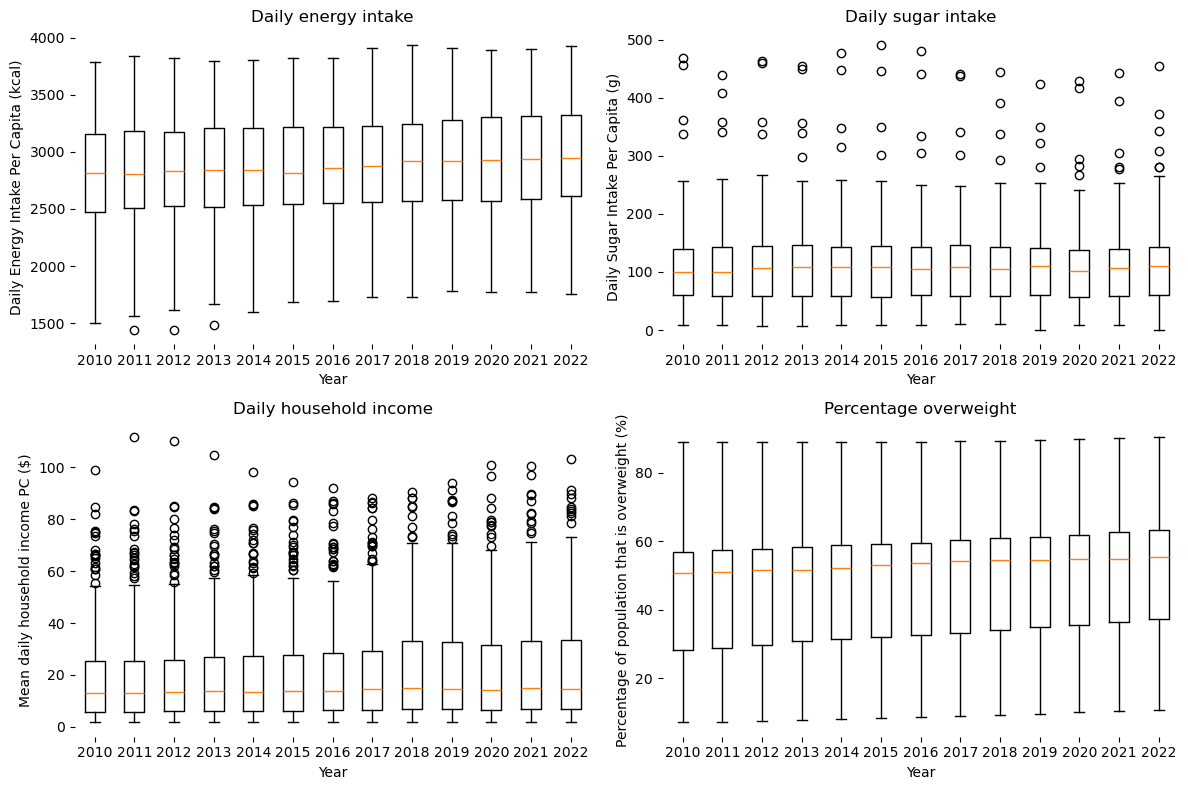

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))

#boxplot of food intake per year
dataframes_boxplot(ax[0,0], food_df, "Daily Energy Intake Per Capita (kcal)", "Daily energy intake")

#boxplot of sugar intake per year
dataframes_boxplot(ax[0,1], sugar_df, "Daily Sugar Intake Per Capita (g)", "Daily sugar intake")

#boxplot of incomeper year
dataframes_boxplot(ax[1,0], income_df, "Mean daily household income PC ($)", "Daily household income")

#boxplot of overweight per year
dataframes_boxplot(ax[1,1], overweight_df, "Percentage of population that is overweight (%)", "Percentage overweight")

plt.tight_layout()
plt.show()

# Bar plots showing maximum and minimum for all datasets

I will create a function to plot bar plots for the mean, maximum, and minimum mean daily energy intakes

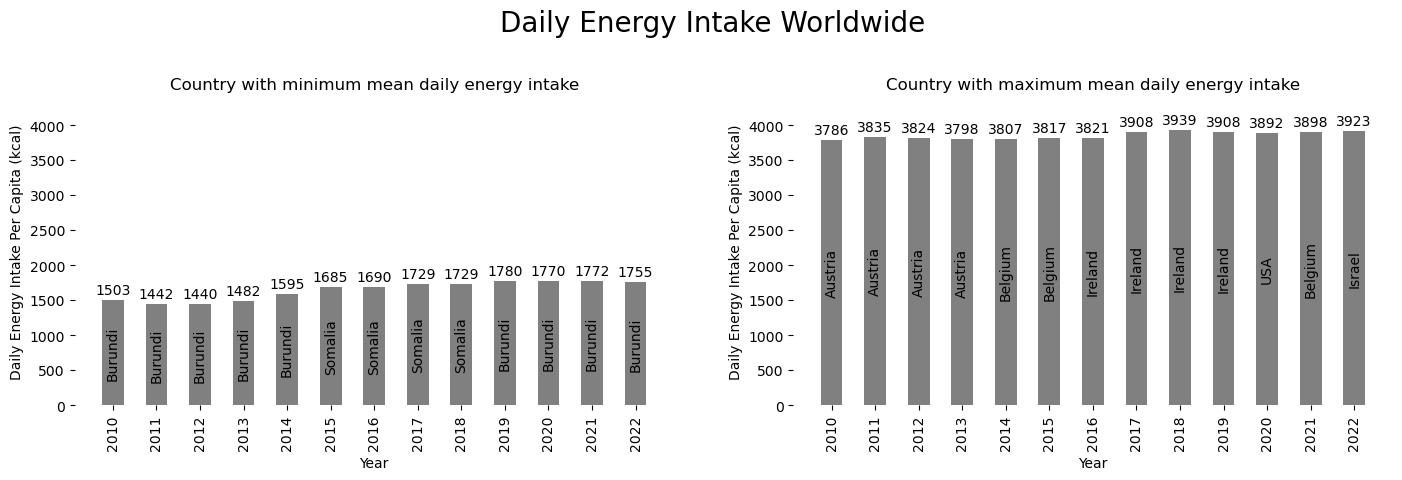

In [20]:
def barplot(ax, dataframe, country_column, value_column, title_name, ylim, ylabel,
            label_type = "center", padding_num = 2, padding_country = 0):

    #to remove decimal places from calories in label
    formatted_calories = [f"{calorie:.0f}" for calorie in dataframe[value_column]] 
    
    ax.bar(dataframe.index, dataframe[value_column], color = "gray",  width = 0.5)
    ax.set(xlabel = "Year", ylabel = ylabel, ylim = ylim, title = title_name)
    ax.tick_params(axis = "x", rotation = 90)
    #country name bar label
    ax.bar_label(ax.containers[0], labels = dataframe[country_column],  label_type = label_type, rotation = 90,
                 padding = padding_country) 
    ax.bar_label(ax.containers[0], labels = formatted_calories, padding = padding_num)#calories bar label

    #get rid of spines
    for spine in ax.spines.values():
        spine.set_visible(False)

#plotting food plots 
fig, ax = plt.subplots(1, 2, figsize = (17,4))

food_ylim = (0,4400)
food_ylabel = "Daily Energy Intake Per Capita (kcal)"

barplot(ax[0], summary_food_df, "min country", "min energy intake (kcal)", 
             "Country with minimum mean daily energy intake", food_ylim, food_ylabel)
barplot(ax[1], summary_food_df, "max country", "max energy intake (kcal)",
             "Country with maximum mean daily energy intake", food_ylim, food_ylabel)
plt.suptitle("Daily Energy Intake Worldwide", fontsize = 20, y = 1.1)

plt.show()

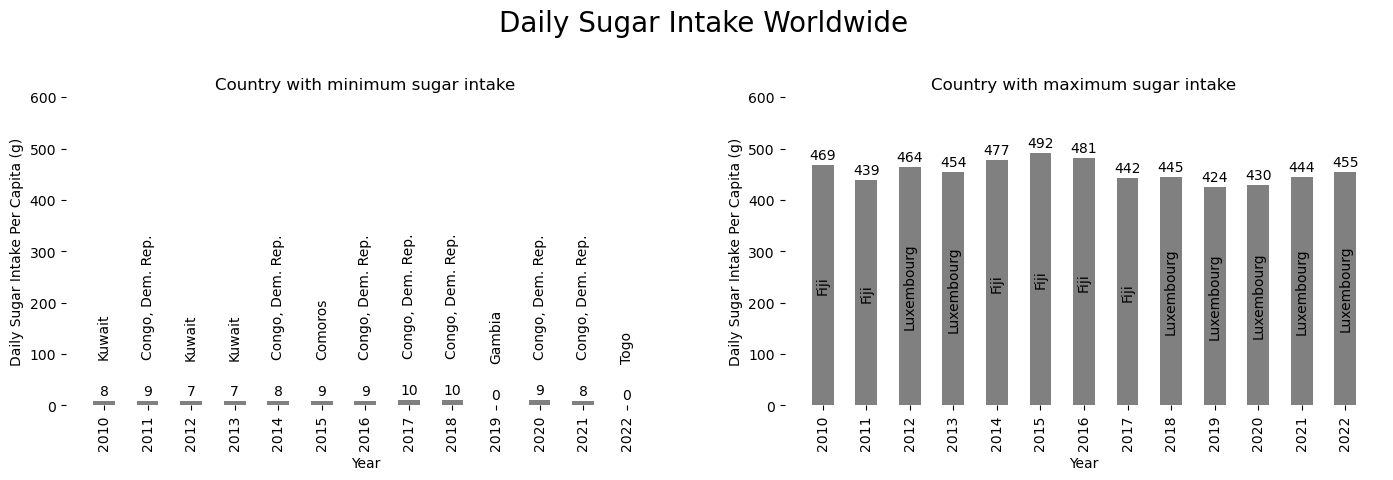

In [21]:
#plotting sugar plots 
fig, ax = plt.subplots(1, 2, figsize = (17,4))

sugar_ylim = (0,600)
sugar_ylabel = "Daily Sugar Intake Per Capita (g)"

barplot(ax[0], summary_sugar_df, "min country", "min sugar intake (g)", 
             "Country with minimum sugar intake", sugar_ylim, sugar_ylabel, label_type = "edge", padding_country = 30) #I need to manually adjust country bar labels
barplot(ax[1], summary_sugar_df, "max country", "max sugar intake (g)",
             "Country with maximum sugar intake", sugar_ylim, sugar_ylabel)



plt.suptitle("Daily Sugar Intake Worldwide", fontsize = 20, y = 1.1)

plt.show()


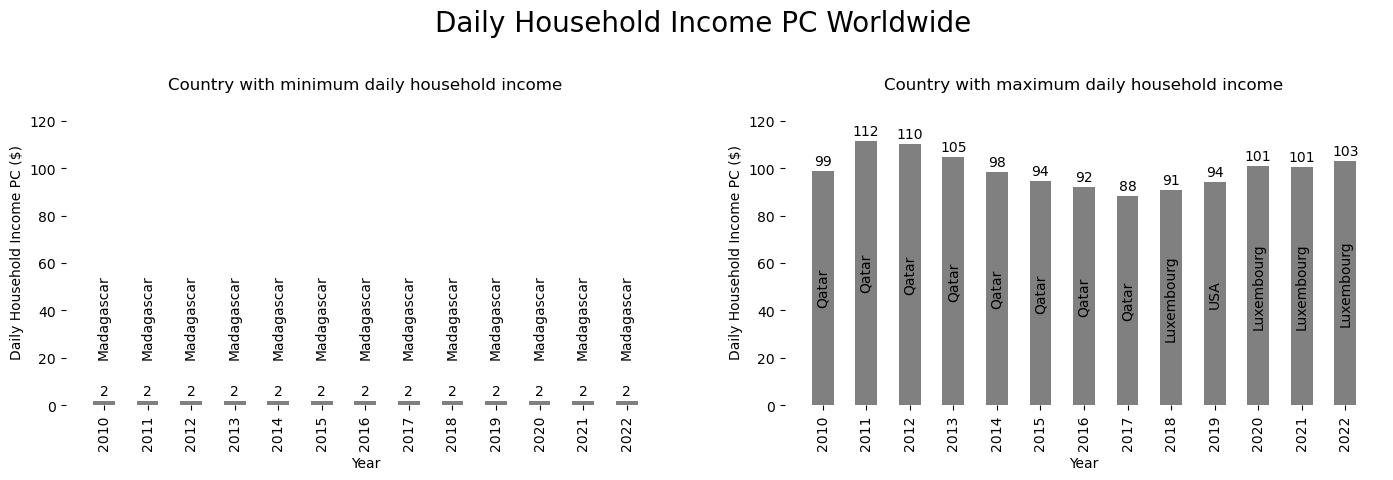

In [22]:
#plotting income plots 
fig, ax = plt.subplots(1, 2, figsize = (17,4))

income_ylim = (0,130)
income_ylabel = "Daily Household Income PC ($)"

barplot(ax[0], summary_income_df, "min country", "min daily income PC ($)", 
             "Country with minimum daily household income", income_ylim, income_ylabel, label_type = "edge", padding_country = 30 ) 
barplot(ax[1], summary_income_df, "max country", "max daily income PC($)",
             "Country with maximum daily household income", income_ylim, income_ylabel)



plt.suptitle("Daily Household Income PC Worldwide", fontsize = 20, y = 1.1)

plt.show()


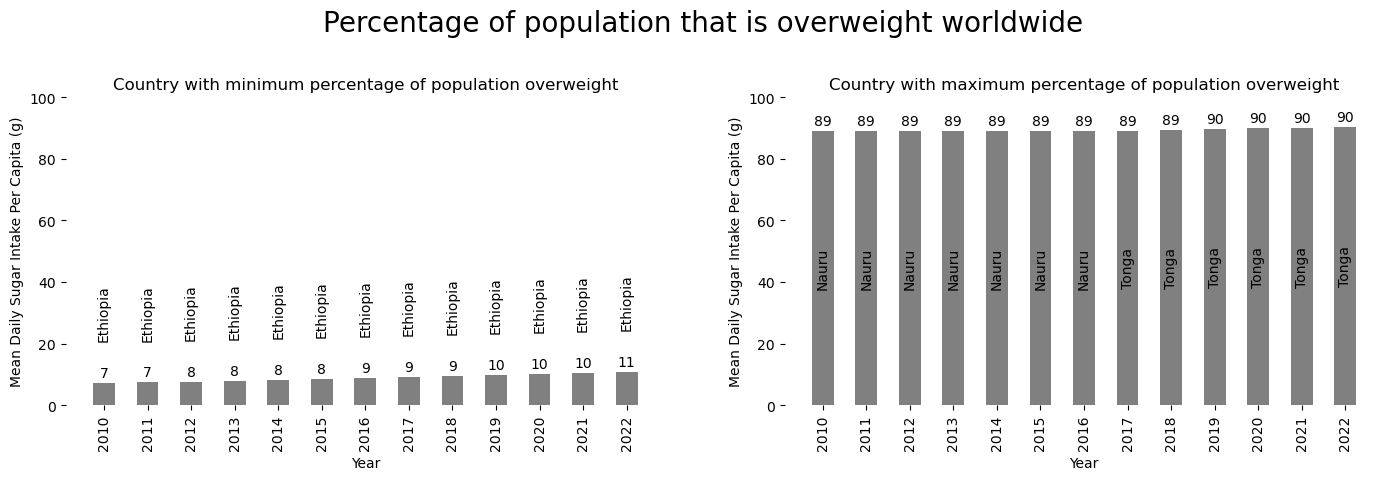

In [23]:
#plotting overweight plots 
fig, ax = plt.subplots(1, 2, figsize = (17,4))

overweight_ylim = (0,100)
overweight_ylabel = "Mean Daily Sugar Intake Per Capita (g)"

barplot(ax[0], summary_overweight_df, "min country", "min overweight (%)", 
             "Country with minimum percentage of population overweight", overweight_ylim, overweight_ylabel, label_type = "edge", padding_country = 30) #I need to manually adjust country bar labels
barplot(ax[1], summary_overweight_df, "max country", "max overweight (%)",
             "Country with maximum percentage of population overweight", overweight_ylim, overweight_ylabel)



plt.suptitle("Percentage of population that is overweight worldwide", fontsize = 20, y = 1.1)

plt.show()


## Examining correlation between variables

In [24]:
#create one big dataframe in order to generate a correlation matrix

#make big dataframe
everything_df = pd.concat({"energy intake": food_df,
                           "sugar intake" : sugar_df,
                           "income" : income_df,
                           "overweight" : overweight_df}, 
                          axis = 1)

everything_df = everything_df.stack()

corr_matrix = everything_df.corr()
corr_matrix

/var/folders/sl/jvv85yl95pzgc6nzn9bks2040000gn/T/ipykernel_3360/1610199539.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  everything_df = everything_df.stack()


,energy intake,sugar intake,income,overweight
energy intake,1.00,0.45,0.70,0.55
sugar intake,0.45,1.00,0.47,0.54
income,0.70,0.47,1.00,0.38
overweight,0.55,0.54,0.38,1.00


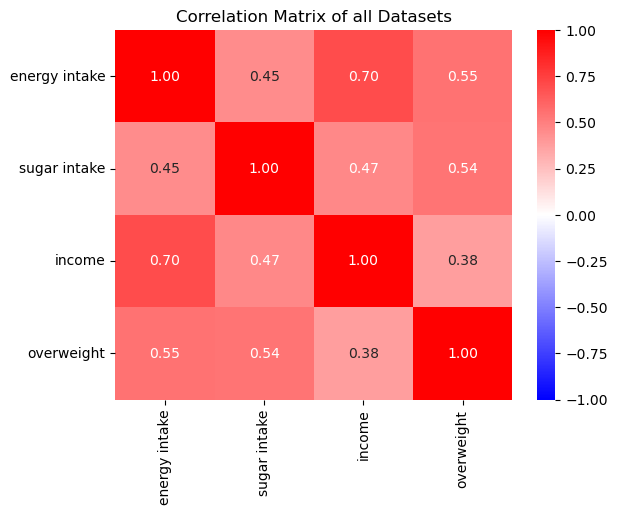

In [25]:
#make a heatmap

#make midpoint of heatmap equal zero

midpoint = mcolors.TwoSlopeNorm(vmin = -1, vcenter = 0, vmax = 1)

plt.figure()
sns.heatmap(corr_matrix, annot = True, cmap = "bwr", fmt = ".2f", norm = midpoint)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Correlation Matrix of all Datasets")
plt.show()

In [26]:
#Draw graphs to illustrate